<a href="https://colab.research.google.com/github/github-ashwin/Python/blob/main/ResumeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gauravduttakiit/resume-dataset
!unzip -o resume-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
License(s): CC0-1.0
Archive:  resume-dataset.zip
  inflating: UpdatedResumeDataSet.csv  


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("./UpdatedResumeDataSet.csv")
df = df[['Resume', 'Category']].dropna()

In [ ]:
df

,Resume,Category
0,Skills * Programming Languages: Python (pandas...,Data Science
1,Education Details \r\nMay 2013 to May 2017 B.E...,Data Science
2,"Areas of Interest Deep Learning, Control Syste...",Data Science
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Data Science
4,"Education Details \r\n MCA YMCAUST, Faridab...",Data Science
...,...,...
957,Computer Skills: â¢ Proficient in MS office (...,Testing
958,â Willingness to accept the challenges. â ...,Testing
959,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Testing
960,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Testing


In [ ]:
# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    return text

df['clean'] = df['Resume'].apply(clean_text)

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean'])
y = df['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

                           precision    recall  f1-score   support

                 Advocate       1.00      0.33      0.50         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       0.86      1.00      0.92        12
                   Hadoop       1.00 

In [ ]:
y_pred

array(['Java Developer', 'Java Developer', 'Java Developer', 'Hadoop',
       'Health and fitness', 'Network Security Engineer',
       'Mechanical Engineer', 'Automation Testing', 'HR',
       'Health and fitness', 'Hadoop', 'HR', 'Mechanical Engineer',
       'Testing', 'Python Developer', 'Civil Engineer', 'Data Science',
       'Business Analyst', 'ETL Developer', 'DotNet Developer', 'PMO',
       'Arts', 'ETL Developer', 'Testing', 'Testing', 'Data Science',
       'Sales', 'Sales', 'Automation Testing', 'HR', 'Operations Manager',
       'Arts', 'DevOps Engineer', 'Web Designing',
       'Electrical Engineering', 'Testing', 'Database', 'HR',
       'Web Designing', 'DevOps Engineer', 'Operations Manager',
       'Data Science', 'DevOps Engineer', 'PMO', 'Web Designing',
       'Testing', 'SAP Developer', 'Arts', 'Java Developer',
       'Business Analyst', 'Java Developer', 'Sales',
       'Electrical Engineering', 'Civil Engineer', 'Java Developer',
       'Hadoop', 'Arts', 'PMO

In [ ]:
sample_resume = "Experienced in Java development, Spring framework, and RESTful APIs."

# Clean and vectorize
clean_sample = clean_text(sample_resume)
vectorized_sample = vectorizer.transform([clean_sample])

# Predict
predicted_category = model.predict(vectorized_sample)
print("\nPredicted Category:", predicted_category[0])


Predicted Category: Java Developer



Accuracy Score: 0.9845


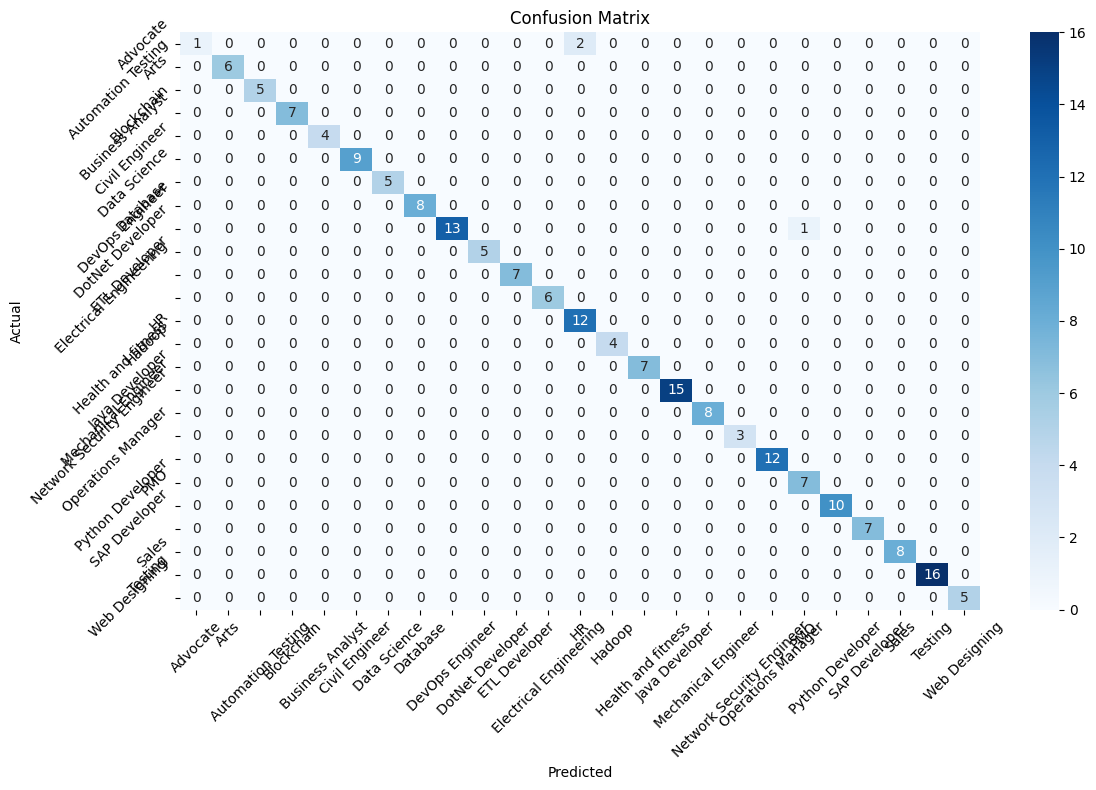

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

print(f"\nPrecision: {report['weighted avg']['precision']:.4f}")
print(f"Recall:    {report['weighted avg']['recall']:.4f}")
print(f"F1-Score:  {report['weighted avg']['f1-score']:.4f}")


Precision: 0.9866
Recall:    0.9845
F1-Score:  0.9823


In [ ]:
#Test-2
sample_resume = "Skilled in data wrangling, exploratory data analysis, machine learning using Python, and visualization with Matplotlib and Seaborn"

# Clean and vectorize
clean_sample = clean_text(sample_resume)
vectorized_sample = vectorizer.transform([clean_sample])

# Predict
predicted_category = model.predict(vectorized_sample)
print("\nPredicted Category:", predicted_category[0])


Predicted Category: Data Science


In [ ]:
#Test-3
sample_resume = "Well-versed in recruitment, employee engagement, payroll processing, and organizational development activities."

# Clean and vectorize
clean_sample = clean_text(sample_resume)
vectorized_sample = vectorizer.transform([clean_sample])

# Predict
predicted_category = model.predict(vectorized_sample)
print("\nPredicted Category:", predicted_category[0])


Predicted Category: HR


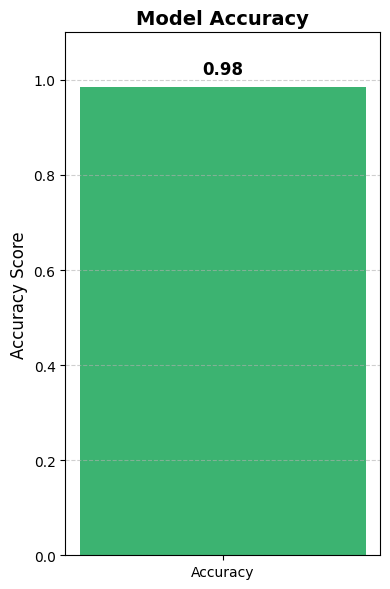

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(4, 6))
bar = plt.bar(['Accuracy'], [accuracy], color='mediumseagreen')


plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold')


plt.ylim(0, 1.1)
plt.title("Model Accuracy", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
